In [1]:
#Importerer alt verktøy vi trenger
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
maindf = pd.read_csv('NAS.csv')

In [3]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4248,2020-10-12,0.7090,0.7100,0.6500,0.6768,0.6768,48320475.0
4249,2020-10-13,0.6768,0.6768,0.6000,0.6006,0.6006,47786200.0
4250,2020-10-14,0.6010,0.6400,0.5962,0.6260,0.6260,37534949.0
4251,2020-10-15,0.6260,0.6260,0.5850,0.6050,0.6050,26737615.0
4252,2020-10-16,0.6050,0.6200,0.6010,0.6106,0.6106,15754218.0


In [4]:
maindf = maindf.dropna()

In [5]:
maindf.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
4233,2020-09-21,1.0500,1.0610,1.0120,1.0140,1.0140,18037182.0
4234,2020-09-22,1.0200,1.0205,1.0000,1.0170,1.0170,12432894.0
4235,2020-09-23,1.0140,1.0210,1.0000,1.0000,1.0000,14605119.0
4236,2020-09-24,1.0000,1.0170,0.9278,0.9550,0.9550,21819631.0
4237,2020-09-25,0.9600,0.9700,0.8000,0.8674,0.8674,39623570.0
4238,2020-09-28,0.8888,0.9400,0.8772,0.9148,0.9148,23594304.0
4239,2020-09-29,0.9154,0.9404,0.8800,0.9200,0.9200,15803885.0
4240,2020-09-30,0.9400,0.9400,0.8964,0.9400,0.9400,12546765.0
4241,2020-10-01,0.9500,1.0130,0.9492,1.0000,1.0000,27036171.0
4242,2020-10-02,1.0000,1.0700,0.9656,1.0000,1.0000,22129251.0


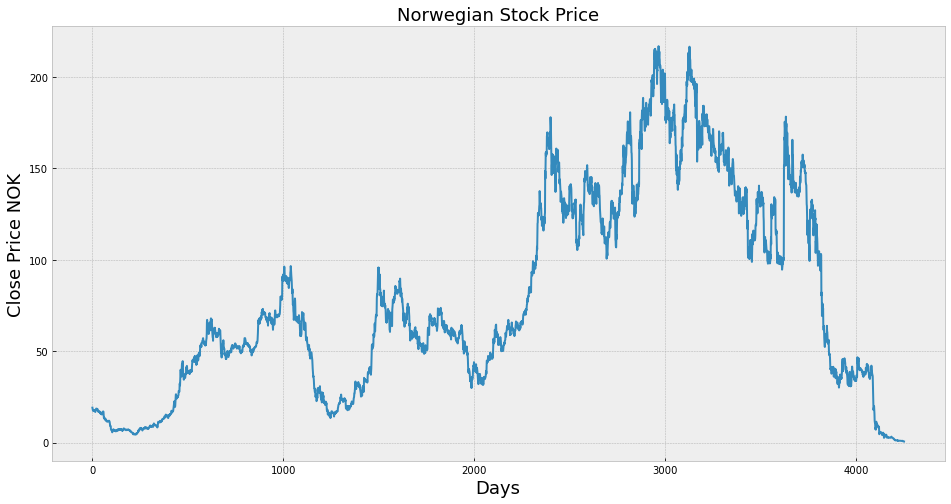

In [6]:
plt.figure(figsize=(16,8))
plt.title('Norwegian Stock Price', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price NOK', fontsize = 18)
plt.plot(maindf['Close'])
plt.show()

In [7]:
maindf.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [8]:
maindf['Date'] = pd.to_datetime(maindf['Date'])

In [9]:
maindf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [10]:
maindf.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [11]:
predictiondf = maindf[['Close']]

In [12]:
predictiondf

,Close
0,19.139799
1,18.454201
2,18.054300
3,17.425800
7,17.254400
...,...
4248,0.676800
4249,0.600600
4250,0.626000
4251,0.605000


In [13]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (the target or dependent variable) shifted 'x' units/days up
predictiondf['Prediction'] = maindf[['Close']].shift(-future_days)
#print the data
predictiondf.tail(4)

<ipython-input-13-ddb5738c5c88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictiondf['Prediction'] = maindf[['Close']].shift(-future_days)


,Close,Prediction
4249,0.6006,NaN
4250,0.6260,NaN
4251,0.6050,NaN
4252,0.6106,NaN


In [14]:
predictiondf.tail(30)

,Close,Prediction
4222,1.0615,0.6768
4223,1.0880,0.6006
4224,1.0540,0.6260
4225,1.0420,0.6050
4226,1.0425,0.6106
4227,1.0445,NaN
4228,1.0470,NaN
4229,1.0475,NaN
4230,1.0325,NaN
4231,1.0445,NaN


In [15]:
x = np.array(predictiondf.drop(['Prediction'], 1))[:-future_days]
print(x)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 1.054   ]
 [ 1.042   ]
 [ 1.0425  ]]


In [16]:
y = np.array(predictiondf['Prediction'])[:-future_days]
print(y)

[17.1401 17.0259 16.7973 ...  0.626   0.605   0.6106]


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [18]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [19]:
x_future = predictiondf.drop(['Prediction'], 1)[:-future_days]

In [20]:
x_future

,Close
0,19.139799
1,18.454201
2,18.054300
3,17.425800
7,17.254400
...,...
4222,1.061500
4223,1.088000
4224,1.054000
4225,1.042000


In [21]:
x_future = x_future.tail(future_days)

In [22]:
x_future

,Close
4202,1.5770
4203,1.3470
4204,1.3995
4205,1.4400
4206,1.3200
4207,1.2510
4208,1.3675
4209,1.3000
4210,1.2920
4211,1.2990


In [23]:
x_future = np.array(x_future)

In [24]:
x_future

array([[1.577 ],
       [1.347 ],
       [1.3995],
       [1.44  ],
       [1.32  ],
       [1.251 ],
       [1.3675],
       [1.3   ],
       [1.292 ],
       [1.299 ],
       [1.263 ],
       [1.2485],
       [1.2595],
       [1.242 ],
       [1.24  ],
       [1.122 ],
       [1.2135],
       [1.06  ],
       [1.0055],
       [1.125 ],
       [1.0615],
       [1.088 ],
       [1.054 ],
       [1.042 ],
       [1.0425]])

In [25]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

[1.0445 1.047  1.0475 1.0325 1.     1.014  1.017  1.     0.955  0.8674
 1.014  0.92   1.014  1.     1.     0.989  0.99   0.9226 0.605  0.6964
 0.9226 0.6006 0.9226 0.605  0.6106]



<ipython-input-26-f899a40fbc0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


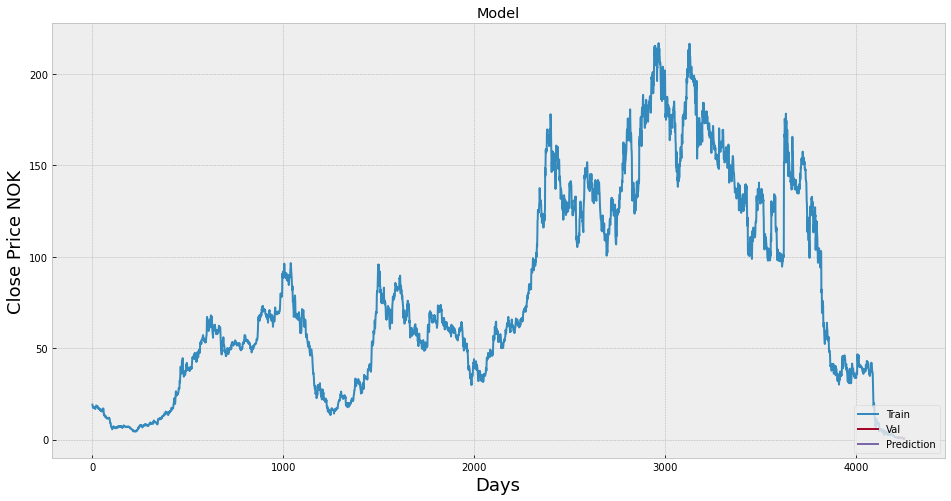

In [26]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  predictiondf[x.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price NOK',fontsize=18)
plt.plot(predictiondf['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()